# Neural Network from Scratch
(Simple feedforward neural network with one hidden layer)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

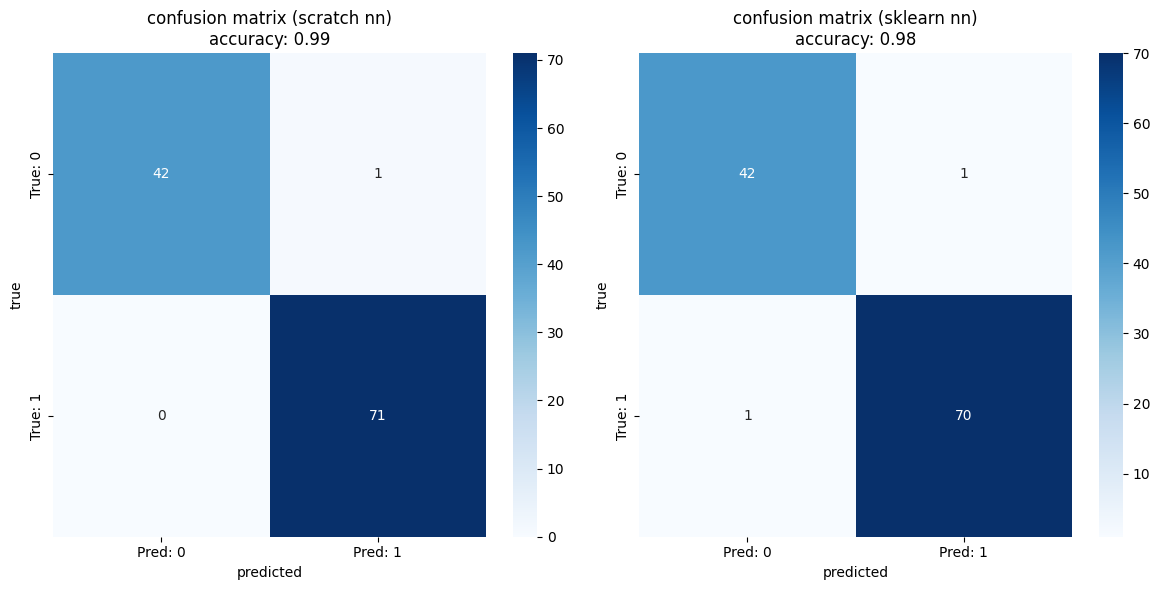

In [2]:
# neural network from scratch
class NeuralNetworkScratch:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        # initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, z):
        # sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, z):
        # derivative of sigmoid function
        return z * (1 - z)

    def fit(self, X, y):
        # reshape y to match output layer dimensions
        y = y.reshape(-1, 1)

        for epoch in range(self.epochs):
            # forward propagation
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self._sigmoid(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self._sigmoid(Z2)

            # compute gradients using backward propagation
            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / len(X)
            db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self._sigmoid_derivative(A1)
            dW1 = np.dot(X.T, dZ1) / len(X)
            db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

            # update weights and biases
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1

    def predict(self, X):
        # forward pass for prediction
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self._sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self._sigmoid(Z2)
        return (A2 > 0.5).astype(int).flatten()

# load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train neural network from scratch
nn_scratch = NeuralNetworkScratch(input_size=X.shape[1], hidden_size=10, output_size=1, learning_rate=0.1, epochs=2000)
nn_scratch.fit(X_train, y_train)
y_pred_scratch_nn = nn_scratch.predict(X_test)

# train neural network using scikit-learn
nn_sklearn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
nn_sklearn.fit(X_train, y_train)
y_pred_sklearn_nn = nn_sklearn.predict(X_test)

# compute confusion matrices
cm_scratch_nn = confusion_matrix(y_test, y_pred_scratch_nn)
cm_sklearn_nn = confusion_matrix(y_test, y_pred_sklearn_nn)

# compute accuracy scores
accuracy_scratch_nn = accuracy_score(y_test, y_pred_scratch_nn)
accuracy_sklearn_nn = accuracy_score(y_test, y_pred_sklearn_nn)

# plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# scratch neural network confusion matrix
sns.heatmap(cm_scratch_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'], ax=axs[0])
axs[0].set_title(f'confusion matrix (scratch nn)\naccuracy: {accuracy_scratch_nn:.2f}')
axs[0].set_xlabel('predicted')
axs[0].set_ylabel('true')

# sklearn neural network confusion matrix
sns.heatmap(cm_sklearn_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'], ax=axs[1])
axs[1].set_title(f'confusion matrix (sklearn nn)\naccuracy: {accuracy_sklearn_nn:.2f}')
axs[1].set_xlabel('predicted')
axs[1].set_ylabel('true')

plt.tight_layout()
plt.show()